Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

Reading the data

In [2]:
df_raw = pd.read_csv('ex2/ex2data2.txt', header=None)

In [3]:
print(df_raw.shape, '\n', df_raw.head())

(118, 3) 
           0        1  2
0  0.051267  0.69956  1
1 -0.092742  0.68494  1
2 -0.213710  0.69225  1
3 -0.375000  0.50219  1
4 -0.513250  0.46564  1


Plotting the data

In [4]:
ps = df_raw[df_raw[2] == 1]
os = df_raw[df_raw[2] == 0]

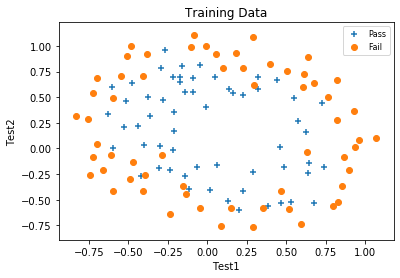

In [5]:
fig, ax1 = plt.subplots()
ax1.scatter(ps[0], ps[1], marker='+')
ax1.scatter(os[0], os[1], marker='o')
ax1.set_xlabel('Test1')
ax1.set_ylabel('Test2')
ax1.set_title('Training Data')
ax1.legend(['Pass', 'Fail'], loc='upper right', fontsize=8)

Feature Mapping

In [6]:
X = df_raw.iloc[:,:-1].values
y = df_raw.iloc[:,-1].values

In [7]:
def MapFeature(x1, x2, degree):
    out = np.ones(len(x1)).reshape(len(x1),1)
    for i in range(1, degree+1):
        for j in range(i+1):
            terms = (x1**(i-j) * x2**j).reshape(len(x1),1)
            out = np.hstack((out, terms))
    return out

In [8]:
X = MapFeature(X[:,0], X[:,1], 6)

In [9]:
X.shape

(118, 28)

Computing Regularized Cost Function and Gradient

In [10]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [11]:
def CostFunctionReg(theta, X, y, lambda1):
    y = y[:, np.newaxis]
    m = len(X)
    t1 = -(y*np.log(sigmoid(X @ theta)))
    t2 = -(1-y)*(np.log(1 - sigmoid(X @ theta)))
    t3 = lambda1/(2*m) * sum(theta**2)
    cost = sum(t1+t2)/m
    regcost = cost + t3
    J_0 = 1/m * (X.transpose() @ (sigmoid(X @ theta) - y))[0]
    J_1 = 1/m * (X.transpose() @ (sigmoid(X @ theta) - y))[1:] + (lambda1/m)*theta[1:]
    grad = np.vstack((J_0[:, np.newaxis], J_1))
    return cost[0], grad

In [12]:
initial_theta = np.zeros((X.shape[1], 1))
lambda1 = 1
cost, grad = CostFunctionReg(initial_theta, X, y, lambda1)

In [13]:
cost

0.6931471805599461

In [14]:
def Gradient(num_iters, lr, theta, X, y, lambda1):
    m = len(X)
    Js = []
    for i in range(num_iters):
        cost, grad = CostFunctionReg(theta, X, y, lambda1)
        theta = theta - (lr*grad)
        Js.append(cost)
    return theta, Js

In [15]:
theta, Js = Gradient(800, 0.2, initial_theta, X, y, 1)

In [16]:
Js[-1]

0.4742169639851524

In [17]:
theta

array([[ 1.15987756],
       [ 0.55051407],
       [ 1.09109723],
       [-1.85053608],
       [-0.77608983],
       [-1.20574206],
       [ 0.0844071 ],
       [-0.32391126],
       [-0.32345481],
       [-0.18536433],
       [-1.36740061],
       [-0.0665013 ],
       [-0.55429143],
       [-0.22755779],
       [-1.1090058 ],
       [-0.24513659],
       [-0.19319407],
       [-0.06071696],
       [-0.2458457 ],
       [-0.25441648],
       [-0.49933013],
       [-0.98909107],
       [ 0.00667865],
       [-0.26927432],
       [ 0.00246883],
       [-0.29670861],
       [-0.11504222],
       [-0.93031612]])

Plotting Cost Function

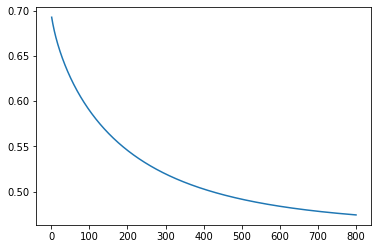

In [18]:
import matplotlib.pyplot as plt
num_iters1 = np.arange(1,801)
fig, ax3 = plt.subplots()
ax3.plot(num_iters1, Js)

Plotting Decision Boundary

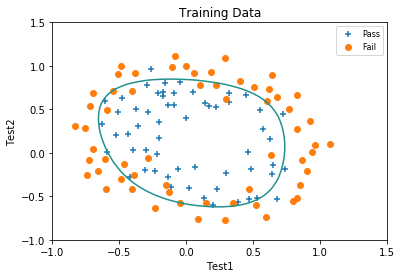

In [22]:
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta
        
plt.scatter(ps[0], ps[1], marker='+')
plt.scatter(os[0], os[1], marker='o')
plt.xlabel('Test1')
plt.ylabel('Test2')
plt.title('Training Data')
plt.legend(['Pass', 'Fail'], loc='upper right', fontsize=8)
plt.contour(u_vals,v_vals,z.T,0)

Rough